# Importando um módulo D
Para começar, após ter completado com sucesso a instalação do pacote conforme explicado no [README](README.md),
basta importá-lo:

In [1]:
import pandas as pd
import epidemiad
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Agora vamos começar a utilizar o nosso código D. Primeiro o modelo SIR:

In [2]:
# Definindo os parâmetros:
beta = 0.1;
gama = 1. / 21;
N = 150000;
I0 = 2;
tf = 365.0;
# Instanciando o Modelo
SIR_model = epidemiad.SIR(N, beta, gama)

In [3]:
#Inicializando o modelo
SIR_model.initialize(N-I0, I0, 0)

In [4]:
%%time
# Simulando 365 dias de dinâmica
sim = SIR_model.run(0, tf)

CPU times: user 286 ms, sys: 25.9 ms, total: 312 ms
Wall time: 310 ms


Agora vamos visualizar o resultado da simulação

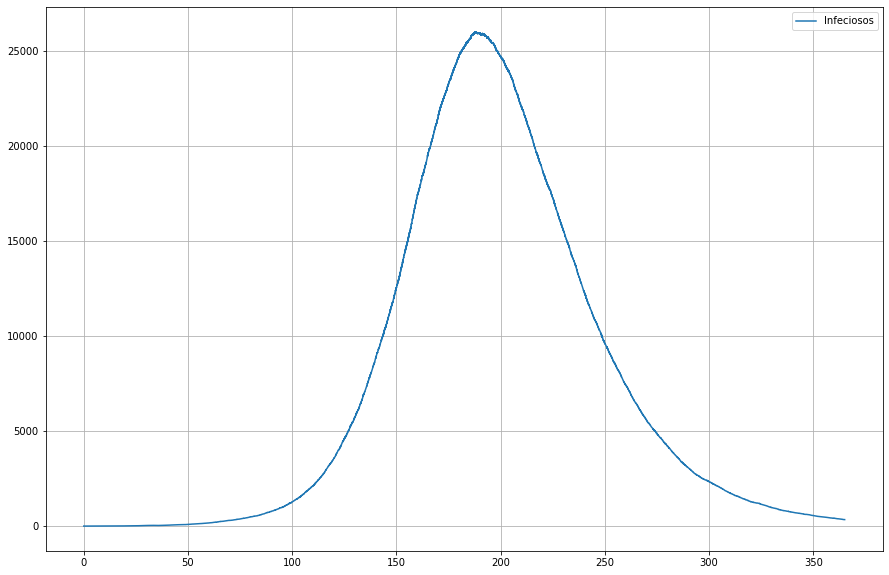

In [5]:
f = figure(figsize=(15,10))
plot(sim[0], sim[2], label='Infeciosos');
legend(loc=0);
grid();

A tupla `sim` contém quatro listas: t, S, I e R:

In [6]:
len(sim)

4

Agora vamos testar o modelo SIR com demografia, i.e. nascimentos e mortes.

In [46]:
N = 15000
beta = 0.17
alpha = 0.1
model_SIRdem = epidemiad.SIR_Dem(N, alpha, beta, gama)

In [47]:
#Inicializando o modelo
I0=10
model_SIRdem.initialize(N-I0, I0, 0)

In [61]:
%%time
# Simulando 365 dias de dinâmica
sim2 = model_SIRdem.run(0, 730)

CPU times: user 5.96 s, sys: 234 ms, total: 6.2 s
Wall time: 6.14 s


Agora vamos visualizar o resultado da simulação

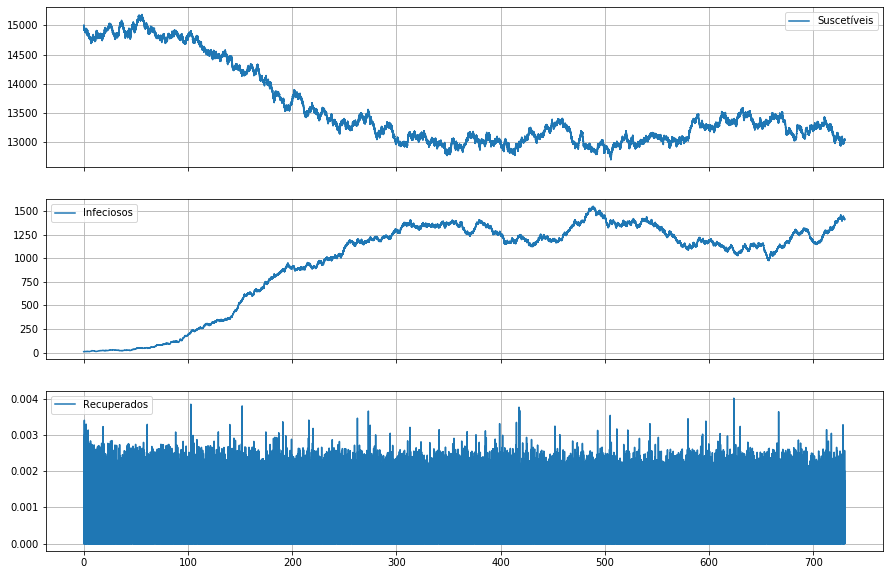

In [64]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,10))
ax1.plot(sim2[0][:len(sim2[1])], sim2[1], label='Suscetíveis');
ax1.legend(loc=0);
ax1.grid(True);
ax2.plot(sim2[0][:len(sim2[2])], sim2[2], label='Infeciosos');
ax2.legend(loc=0);
ax2.grid(True);
ax3.plot(sim2[0][:len(sim2[3])], sim2[3], label='Recuperados');
ax3.legend(loc=0);
ax3.grid(True);

## Exercícios

1. Importe a versão Python destes modelo e calcule qual a implementação mais veloz.
1. No modelo `SIR_Dem`, vemos que o número de Infecciosos apresenta um **equilíbrio endêmico** ($I(t) > 0$). Estime por simulação qual a probabilidade do número de infecciosos no tempo $t_f$ convergir para este equilíbrio endêmico em função do número inicial de Infecciosos, $I(0)$.
1. Usando a biblioteca `concurrent.futures` do Python, encontre uma maneira de realizar 100 simulações do modelo SIR, em paralelo. Verifique o tempo total utilizado para realizar as simulações e comprove que é menor que 100 vezes o tempo necessário para rodar uma única simulação.